# Your Final Project Title

- Member 1: Caren Chua
- Member 2: Abby Salas 
- Member 3: Courtney Collins
- Member 4: Arggin Avanessian

## Introduction

## Research Question

#### Are more negative comments getting more engagement?

#### What is the optmial time to post to reach the largest audience on this subreddit

## Dataset Description

## Preprocessing

In [ ]:
!pip install nltk

  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
  Using cached regex-2023.6.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (770 kB)
  Using cached click-8.1.3-py3-none-any.whl (96 kB)


In [2]:
!pip install textblob

  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)


In [19]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 13.2 MB/s eta 0:00:0000:0100:01
  Using cached smart_open-6.3.0-py3-none-any.whl (56 kB)


In [21]:
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 26.5 MB/s eta 0:00:00


In [57]:
# Importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
from gensim import corpora, models
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer

In [75]:
df.head()

,title,score,id,url,comms_num,created,body,timestamp,text,body_sentiment,title_sentiment
7,Fuck antivaxxing retards,10,g6jkhp,https://www.reddit.com/r/VaccineMyths/comments...,8,1.587663e+09,httpsyoutubezBkVCpbNnkU,2020-04-23 20:23:42,httpsyoutubezBkVCpbNnkU,0.0000,-0.5423
119,biologically possible insert 5G tracker human ...,9,khzpug,https://www.reddit.com/r/VaccineMyths/comments...,9,1.608647e+09,Although dont believe true COVID19 vaccine rec...,2020-12-22 16:19:39,Although dont believe true COVID19 vaccine rec...,-0.4993,0.0000
134,dont see reason trust JJ vaccine,0,ocj9ws,https://www.reddit.com/r/VaccineMyths/comments...,4,1.625288e+09,company knew asbestos products aimed mothers b...,2021-07-03 07:57:05,company knew asbestos products aimed mothers b...,-0.4708,0.0080
145,Vaccine Survey,0,ak5ziq,https://www.reddit.com/r/VaccineMyths/comments...,5,1.548543e+09,Hi guys wondering could help research project ...,2019-01-27 00:42:09,Hi guys wondering could help research project ...,0.6597,0.0000
161,rant please,13,o6nqcm,https://www.reddit.com/r/VaccineMyths/comments...,1,1.624488e+09,sure sub allows need vent need sanity right po...,2021-06-24 01:35:24,sure sub allows need vent need sanity right po...,-0.9433,-0.0258


In [23]:
df = pd.read_csv('reddit_vm.csv')
print(df.describe())

             score    comms_num       created
count  1602.000000  1602.000000  1.602000e+03
mean      3.686642     1.838951  1.547197e+09
std      29.915671    16.115147  7.099511e+07
min     -12.000000     0.000000  1.389595e+09
25%       1.000000     0.000000  1.554367e+09
50%       1.000000     0.000000  1.569226e+09
75%       3.000000     1.000000  1.584901e+09
max    1187.000000   595.000000  1.640822e+09


## Preprocessing

In [28]:
# Remove duplicates
df = df.drop_duplicates()

In [27]:
# Remove missing rows
df = df.dropna()

In [66]:
# Remove symbols from text data
df['body'] = df['body'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
df['title'] = df['title'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

In [58]:
# Download stopwords if not already downloaded
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [67]:
# Remove stop words from text data
stop_words = set(stopwords.words('english'))
df['body'] = df['body'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))
df['title'] = df['title'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

## Analysis

In [50]:
# Sentiment Analysis
texts = df['body'].tolist()
tokenized_texts = [text.lower().split() for text in texts]

In [81]:
sia = SentimentIntensityAnalyzer()

# Calculate sentiment scores for body text
df['body_sentiment'] = df['body'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [71]:
# Calculate sentiment scores for title
df['title_sentiment'] = df['title'].apply(lambda x: sia.polarity_scores(x)['compound'])

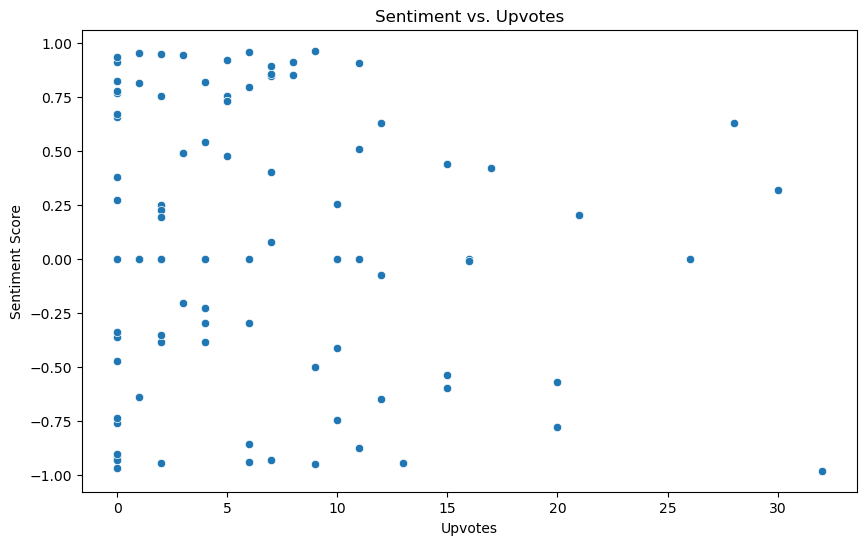

In [69]:
# Visualization: Body Sentiment vs. Upvotes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='score', y='body_sentiment', data=df)
plt.xlabel('Upvotes')
plt.ylabel('Sentiment Score')
plt.title('Sentiment vs. Upvotes')
plt.show()

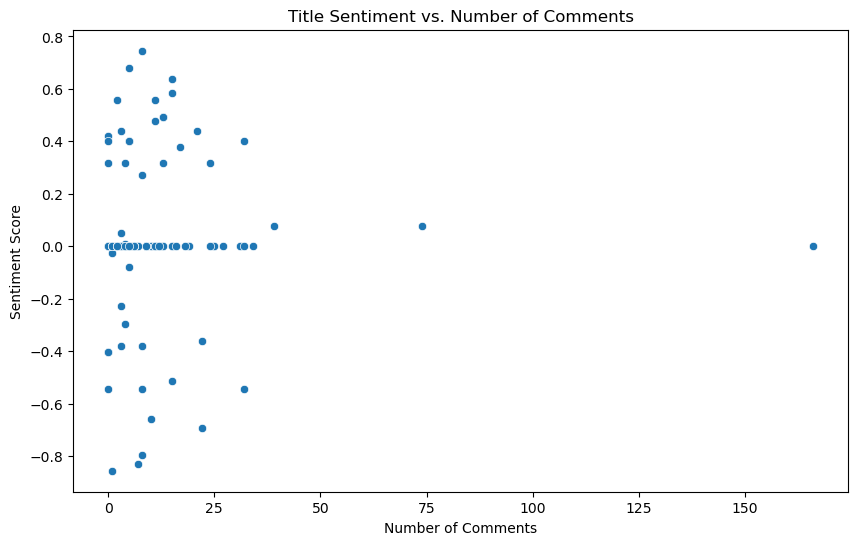

In [74]:
# Visualization: Title Sentiment vs. Upvotes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='comms_num', y='title_sentiment', data=df)
plt.xlabel('Number of Comments')
plt.ylabel('Sentiment Score')
plt.title('Title Sentiment vs. Number of Comments')
plt.show()

In [77]:
df['interaction'] = df['comms_num'] + df['score']

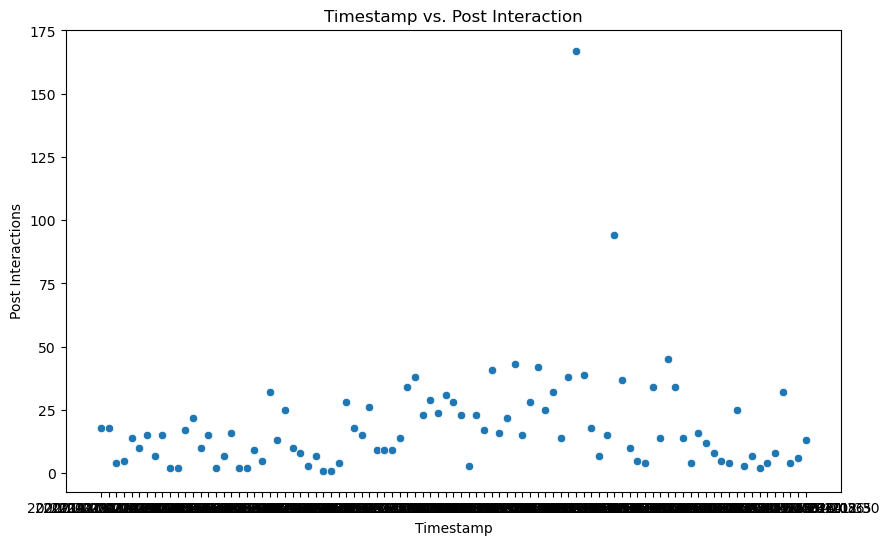

In [79]:
# Visualization: Body Sentiment vs. Upvotes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='timestamp', y='interaction', data=df)
plt.xlabel('Timestamp')
plt.ylabel('Post Interactions')
plt.title('Timestamp vs. Post Interaction')
plt.show()

In [55]:
# Create dictionary of words
dictionary = corpora.Dictionary(tokenized_texts)

# Convert tokenized texts to document-term matrix
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

# Perform LDA topic modeling
num_topics = 5
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary)

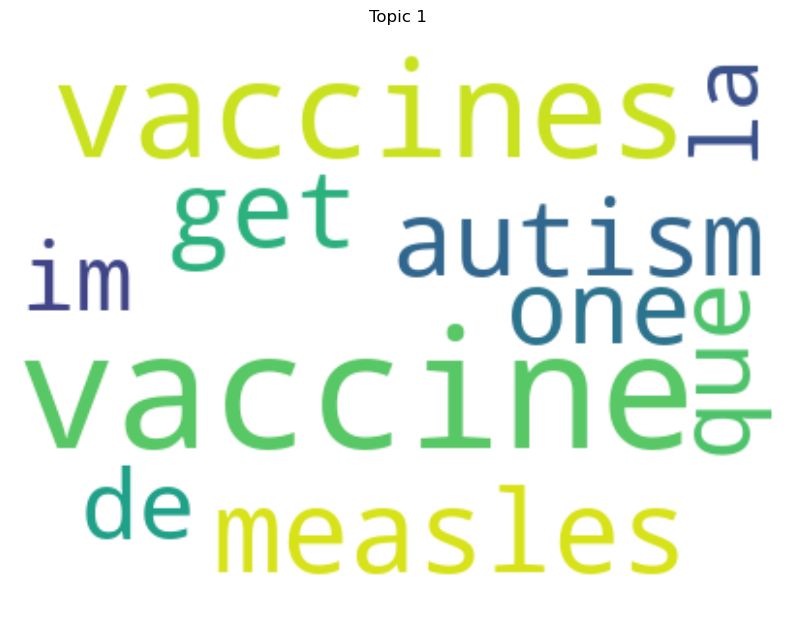

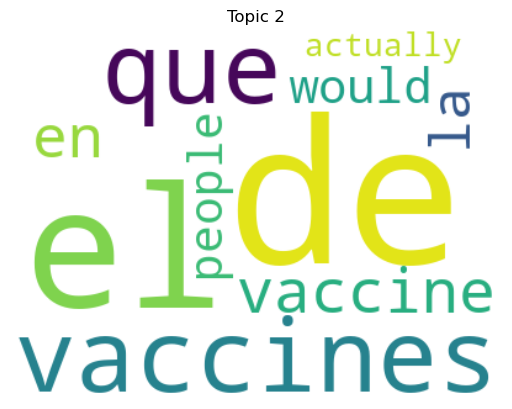

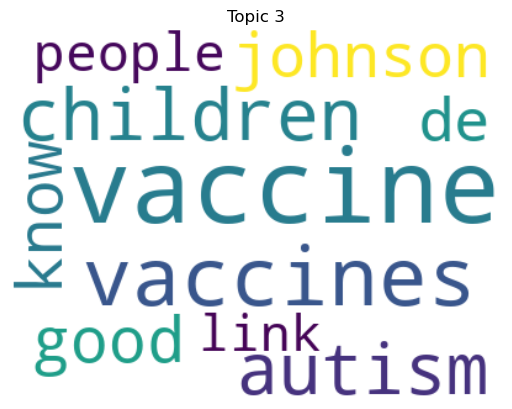

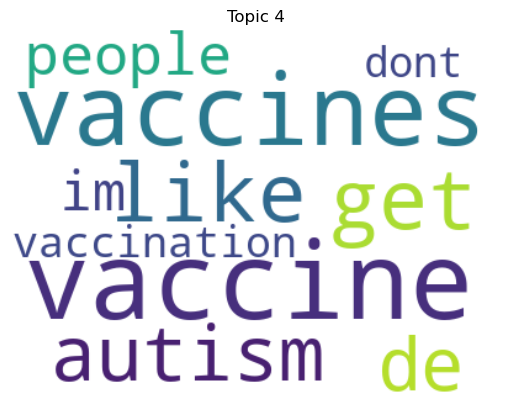

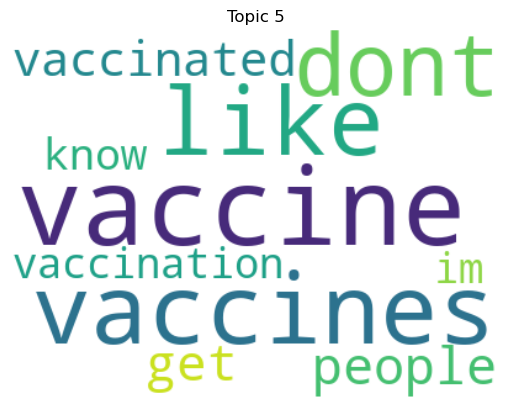

In [56]:
# Visualize topics using word cloud
plt.figure(figsize=(10, 8))
for topic in lda_model.show_topics(num_topics=num_topics, formatted=False):
    topic_words = dict(topic[1])
    wordcloud = WordCloud(width=400, height=300, background_color='white').generate_from_frequencies(topic_words)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Topic {}'.format(topic[0] + 1))
    plt.show()

## Visualization

In [14]:
!pip install bokeh

## Results/Findings

## Contribution